# Analysis of the floe size distribution
The Ice Floe Tracker (IFT) identifies sea ice floes in optical satellite images. Challenges to floe observation include cloud cover, indistinct floe boundaries, and floe sizes at or below the imager resolution. As a result of these challenges the floes identified by the IFT represent a sample of available floes. Since the original submission, we have revised our data quality control procedure, increasing the number of available floes for FSD analysis. In the original paper, we carried out a simple analysis of the FSD by binning all the images together. With the updated dataset, we improve upon our original method by calculating best fit alpha parameters for every image with at least 100 identified floes.



We developed a new approach to floe shape extraction, making a higher quality set of shapes. While we feel that our original approach is informative for connecting the FSD and velocity, we agree with the reviewers that a more thorough approach is warranted.

Calculating FSD per image instead of overall - higher FSD value, can see a seasonal trend


The IFT data does not represent full enumeration of the FSD. Rather, we are looking at some sort of random sample of the FSD and we are estimating it over multiple days. 
- powerlaw PDF uses logarithmic binning
- CDFs and CCDFs do not require binning

powerlaw goodness of fit


In [139]:
#Import everything
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import csv
import powerlaw
import os
import proplot as pplt
from datetime import datetime
import warnings
warnings.simplefilter('ignore')

In [2]:
temp = []
for year in range(2003, 2021):
    temp.append(pd.read_csv('../data/floe_tracker/ift_floe_property_tables/with_nsidc/ift_floe_properties_{y}.csv'.format(y=year),
                            parse_dates=True))
df = pd.concat(temp)
df['datetime'] = pd.to_datetime(df['datetime'].values)
df = df.loc[(df.datetime.dt.dayofyear >= 91) & (df.datetime.dt.dayofyear <= 258)]

In [3]:
df['perim_km'] = df.perimeter*.25
df['area_km'] = df.area*.25*.25
df['area_adj_km'] = (np.sqrt(df.area) + 6)**2*.25*.25 # 6 pixel shift minimizes error against manual
df['doy'] = df.datetime.dt.dayofyear
df['year'] = df.datetime.dt.year

# Number of floes detected per image
The number of floes detected per image evolves through the year, with one peak in mid April and a secondary peak in June.

The floe size distribution in the overall sample is useful for understanding what data we have access to. We want to see the number per year and the variation in the number across all the years, as well as the data density per month.

The figure below is showing how the FSD varies from image to image. The distribution is more narrow for the small floes than for large floes.

# Model goodness-of-fit as a function of x min
The powerlaw function does have the option to find x-min on its own, however, we want consistency across all the data so we look the value that tends to minimize the difference between the data and the assumed distribution. We test both the power law and the lognormal distributions.

In [5]:
df_filtered = df.groupby('datetime').filter(lambda x: len(x) > 200)
date_sample = np.random.choice(np.unique(df_filtered.datetime), 100)

In [6]:
%%time
import warnings
warnings.simplefilter('ignore')

xmin_vals = np.arange(1, 75, 2)
results_pl = []
results_ln = [] 
results_tpl = []

for count, date in enumerate(date_sample):
    if (count % 10) == 0:
        print(count, date)
        
    area = df.loc[df.datetime == date, 'area_adj_km']
    temp_pl = []
    temp_ln = []
    temp_tpl = []
    for x in xmin_vals:
        fit = powerlaw.Fit(area, xmin=x)
        temp_pl.append(fit.power_law.D)
        temp_tpl.append(fit.truncated_power_law.D)
        temp_ln.append(fit.lognormal.D)
    results_pl.append(pd.Series(temp_pl, index=xmin_vals))
    results_ln.append(pd.Series(temp_ln, index=xmin_vals))
    results_tpl.append(pd.Series(temp_tpl, index=xmin_vals))   

0 2010-04-27T12:21:27.000000000
10 2003-04-10T13:25:35.000000000


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

20 2014-06-05T14:02:19.000000000


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


30 2014-05-22T12:32:38.000000000


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

40 2017-06-20T14:07:54.000000000


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

50 2003-05-13T11:09:14.000000000


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

60 2017-04-26T14:01:45.000000000
70 2005-05-30T12:53:38.000000000


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

80 2018-04-10T13:31:50.000000000
90 2011-06-26T12:13:04.000000000


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the

CPU times: user 3min 24s, sys: 518 ms, total: 3min 24s
Wall time: 3min 25s


In [51]:
large_groups = df.groupby('datetime').filter(lambda x: len(x) > 300)
dates = np.unique(large_groups['datetime'])
sample = np.random.choice(dates, 500)

In our dataset 732 images have more than 300 detected floes. Understanding the IFT results as a sample from the full set of ice floes, we test the minimum number of floes required to recover the power law slope of the full image. We test thresholds from 30 up to 300 floes and take 100 samples without replacement for each threshold size. We calculate the alpha parameter for each subsample and compute the relative error against the fit with all detected floes in the image. The test is carried out on a random sample of 100 of the 732 images.

In [52]:
# In our dataset, 732 images have more than 300 floes per image. To test 
# the erro
n = len(np.unique(large_groups.datetime))
len(sample), n

(500, 732)

In [53]:
%%time
relative_error = {}
thresholds = np.arange(30, 301, 10)
n_resamples = 100
count = 0
xmin = 35
for threshold in thresholds:
    print(threshold)
    relative_error[threshold] = []
    for date in sample:
        sample_group = large_groups.loc[large_groups.datetime == date]
        area = sample_group.area_adj_km
        fit = powerlaw.Fit(area, xmin=xmin)
        alpha = fit.power_law.alpha
        
        for ii in range(n_resamples):
            area_resamp = sample_group.sample(threshold).area_adj_km
            fit = powerlaw.Fit(area_resamp, xmin=xmin)
            relative_error[threshold].append((fit.power_law.alpha - alpha) / alpha)

30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
CPU times: user 7min 21s, sys: 882 ms, total: 7min 22s
Wall time: 17min 18s


In [54]:
pd.DataFrame(relative_error).to_csv('../data/test_data/relative_error_pl_alpha.csv')


In [55]:
relative_error = pd.DataFrame(relative_error)

In [21]:
test_tpl = pd.DataFrame(results_tpl, index=date_sample)
test_pl = pd.DataFrame(results_pl, index=date_sample)
test_ln = pd.DataFrame(results_ln, index=date_sample)

test_tpl.to_csv('../data/test_data/ks_data_tpl.csv')
test_pl.to_csv('../data/test_data/ks_data_pl.csv')
test_ln.to_csv('../data/test_data/ks_data_ln.csv')


In [20]:
test_tpl = pd.read_csv('../data/test_data/ks_data_tpl.csv', index_col=0)
test_pl = pd.read_csv('../data/test_data/ks_data_pl.csv', index_col=0)
test_ln = pd.read_csv('../data/test_data/ks_data_ln.csv', index_col=0)

mkdir: ../data/test_data: File exists


In [56]:
relative_error = pd.read_csv('../data/test_data/relative_error_pl_alpha.csv', index_col=0)
relative_error.columns = relative_error.columns.astype(int)

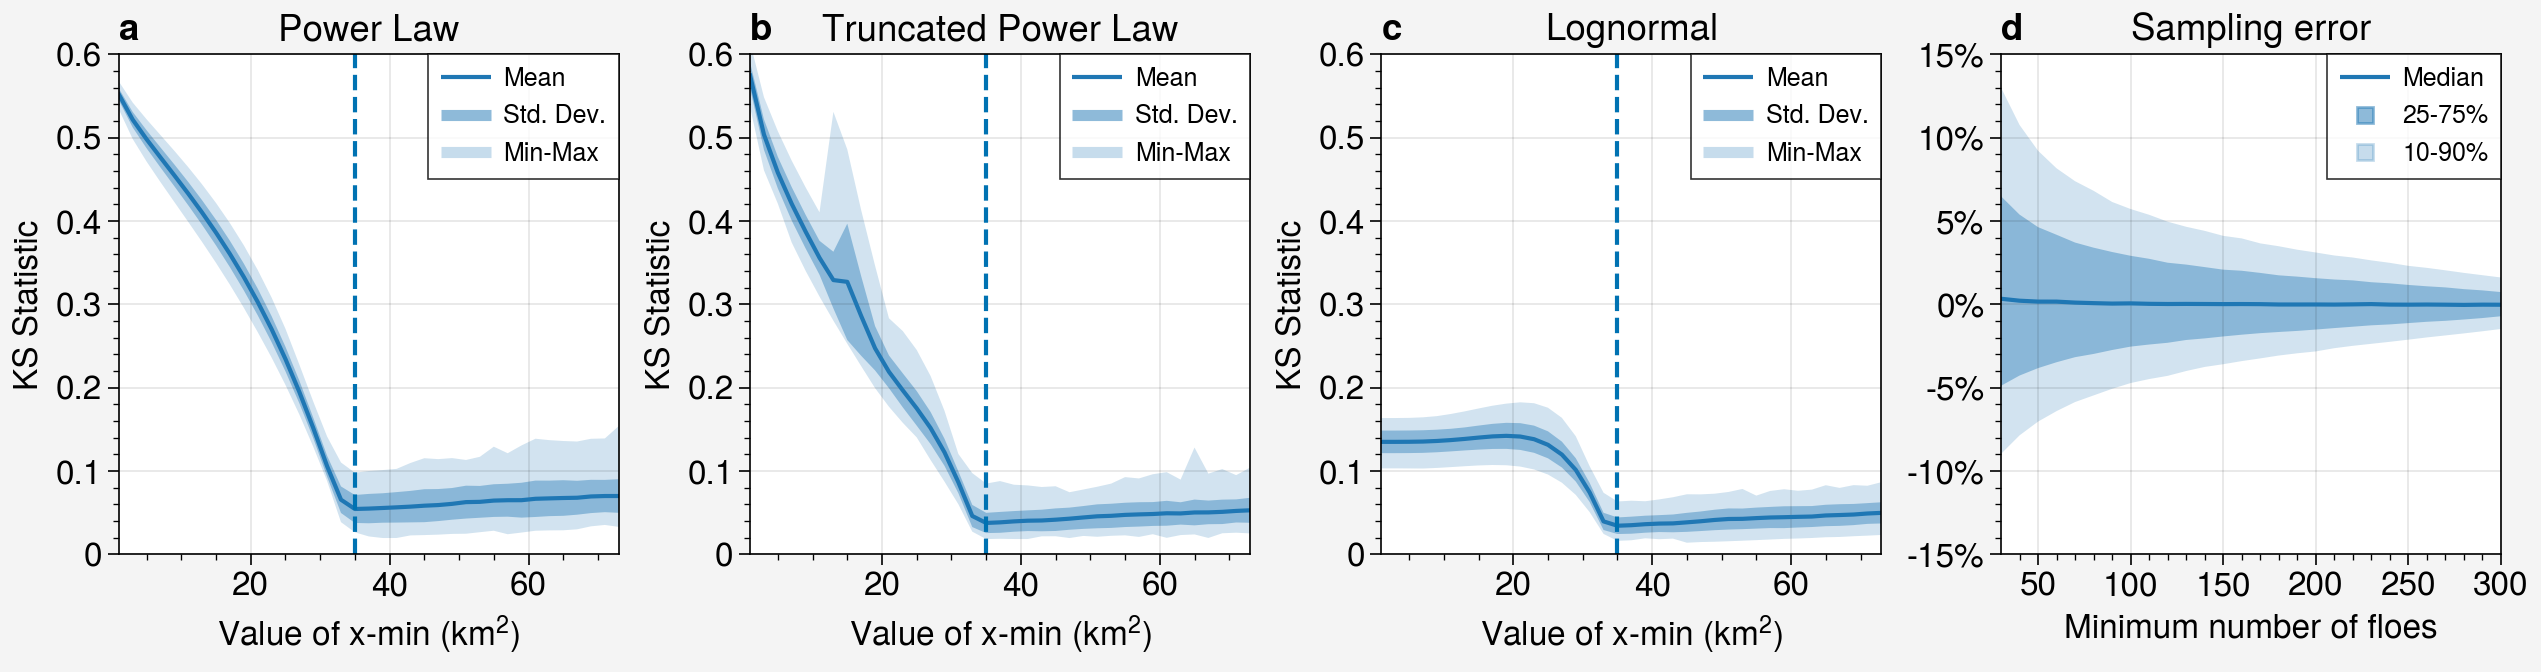

In [57]:
fig, axs = pplt.subplots(ncols=4, nrows=1, sharex=False, sharey=False)

for ax, data, title in zip(axs, [test_pl, test_tpl, test_ln], ['Power Law', 'Truncated Power Law', 'Lognormal']):
    ax.plot(data.mean(axis=0), shadedata=data.std(axis=0), fadedata=[data.min(axis=0), data.max(axis=0)], label='Mean', color='tab:blue')
    ax.plot([],[], lw=4, alpha=0.5, label='Std. Dev.', color='tab:blue')
    ax.plot([],[], lw=4, alpha=0.25, label='Min-Max', color='tab:blue')
    ax.format(xlabel='Value of x-min (km$^2$)', ylabel='KS Statistic', title='{t}'.format(t=title), ylim=(0, 0.6))
    ax.legend(loc='ur', ncols=1)
    ax.axvline(35, ls='--')
axs.format(abc=False)

ax = axs[3]
ax.plot(relative_error.median(axis=0),
        shadedata=[relative_error.quantile(0.25, axis=0),
                   relative_error.quantile(0.75, axis=0)],
        fadedata=[relative_error.quantile(0.1, axis=0),
                  relative_error.quantile(0.9, axis=0)], color='tab:blue')
ax.format(ylocator=[-0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15], ylim=(-0.15, 0.15),
          yformatter=['-15%', '-10%', '-5%', '0%', '5%', '10%', '15%'], xlabel='Minimum number of floes')
ax.format(title='Sampling error')


h = []
for alpha, ls, m in zip([1, 0.5, 0.25], ['-', '', ''], ['', 's', 's']):
    h.append(ax.plot([],[],color='tab:blue', alpha=alpha, ls=ls, m=m))
axs[3].legend(h, ['Median', '25-75%', '10-90%'], ncols=1, loc='ur')
axs[3].legend(h, ['Median', '25-75%', '10-90%'], ncols=1, loc='ur')

axs.format(abc=True, fontsize=12)
# fig.save('../figures/fig03_fsd_setup_figures.pdf', dpi=300)
# fig.save('../figures/fig03_fsd_setup_figures.png', dpi=300)

# Clauset et al. analysis of the significance of the FSD fits
Box 1 in Clauset et al. 2009 contains a "recipe" for analysis of power-law data.
1. Estimate parameters $x_{min}$ and $\alpha$ of the power-law model using the methods in section 3.
2. Calculate the goodness-of-fit between the data and the power law using the method of section 4. If the resulting $p$-value is greater than 0.1, then a power law is a plausible hypothesis for the data, otherwise it is rejected.
3. Compare the power law with alternative hypothesis via likelihood ratio tests. For each alternative, if the calculated likelihood ratio is significantly different from zero, then its sign indicates whether or not the alternative is favored over the power-law model.

The method of minimizing the KS statistic is recommended by Clauset et al. Since we are estimating the $x_{min}$ across many individual instances, our approach is to find the value of $x_{min}$ that minimizes the KS distance in a random sample. Our sample sizes per image are much smaller than the 1000 samples that Clauset et al. recommends, so we expect more noise in the estimates. From the KS tests, the fit is not very sensitive to the exact value of x-min, but if it is less than 32 km$^2$ the performance degrades rapidly. There is less of a change in fit quality as the value goes above 35 km$^2$.

To estimate the p-value of the fit, we can use a bootstrap approach. The method is to take the parameters of the fitted distribution, then to draw random samples to estimate the distribution of the KS statistics. Then, the p-value of the KS statistic for the real data can be estimated by calculating the fraction of the simulated data with KS statistics larger than the real data. The powerlaw package has a built in function to generate a random sample following the same distribution as a fitted value. They suggest a sample size of 2500 for computing p-values with accuracy of 0.01. 

In [83]:
sample_group = large_groups.loc[large_groups.datetime == date]
fit = powerlaw.Fit(sample_group['area_adj_km'], xmin=35)
alpha = fit.power_law.alpha
d = fit.power_law.D
n = len(sample_group)
alpha, d, n

(1.9824618568862693, 0.03803344667054773, 345)

In [84]:
fit.power_law.alpha

1.9824618568862693

In [116]:
# bootstrap test:
# testing significance of fit for small samples
def compute_pvalue(d, alpha, n, bs_n=2500):
    """Uses the bootstrap approach to estimate the p_value of a ks-distance d using
    the best-fit alpha and the sample size n. bs_n is the number of bootstrap replicates."""
    bs_results = []
    for i in range(2500):
        theoretical_distribution = powerlaw.Power_Law(xmin=35.0, parameters=[alpha])
        simulated_data = theoretical_distribution.generate_random(n)
        fit = powerlaw.Fit(simulated_data, xmin=35)
        bs_results.append(fit.power_law.D)
    bs_results = pd.Series(bs_results)
    return len(bs_results[bs_results > d])/len(bs_results)

0.474

To examine the goodness of fit, QQ plots are often used. It's not obvious how to show QQ plots of many realizations, however.

In [43]:
params = []
for count, date in enumerate(date_sample):
    if (count % 10) == 0:
        print(count, date)
        
    area = df.loc[df.datetime == date, 'area_adj_km']
    fit = powerlaw.Fit(area, xmin=35)
    params.append([fit.power_law.alpha,
                  fit.truncated_power_law.alpha,
                  fit.truncated_power_law.parameter2,
                  fit.lognormal.mu,
                  fit.lognormal.sigma])
params_df = pd.DataFrame(params, columns=['alpha', 'alpha_tpl', 'lambda_tpl', 'mu', 'sigma'])

0 2012-04-13T13:06:20.000000000
10 2013-04-29T14:14:11.000000000
20 2011-06-19T12:06:56.000000000
30 2007-04-27T12:48:19.000000000
40 2016-06-28T13:50:24.000000000
50 2020-06-30T12:38:08.000000000
60 2008-05-10T14:08:00.000000000
70 2006-04-12T14:01:05.000000000
80 2003-06-25T13:49:26.000000000
90 2009-05-26T12:24:19.000000000


<a list of 1 Line2D objects>

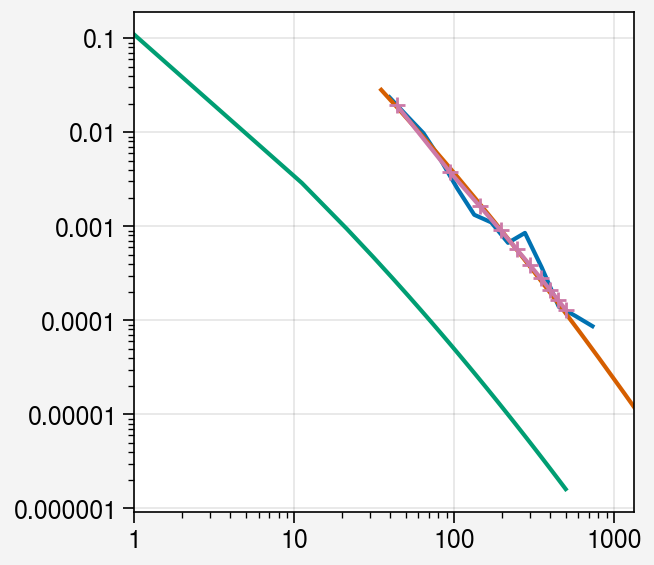

In [91]:
import statsmodels.api as sm
import scipy.stats as stats

fig, ax = pplt.subplots()
area = df.loc[df.datetime == date_sample[0], 'area_adj_km']
fit = powerlaw.Fit(area, xmin=35)
fit.plot_pdf(ax=ax)
fit.lognormal.plot_pdf(ax=ax)
test = stats.lognorm(s=params_df.loc[0,'sigma'],
                     scale=np.exp(params_df.loc[0, 'mu']))
ax.plot(np.linspace(1, 500), test.pdf(np.linspace(1, 500)))
shape, location, scale = stats.lognorm.fit(area)
ax.plot(np.linspace(location+10, 500, 10),
        stats.lognorm.pdf(np.linspace(location+10, 500, 10), shape, location, scale), marker='+')

In [98]:
test.mean(), shape, location, scale

(3.239269618260964, 1.6088384387125725, 34.012501531390114, 31.234138147662918)

In [102]:
np.exp(fit.lognormal.mu + fit.lognormal.sigma**2/2)

3.239269618260964

Defining the lognormal distribution

There are multiple ways to write the same distribution, so we need to be precise about it. Scipy stats uses this form:
$$f(x, s) = \frac{1}{sx\sqrt{2\pi}}\exp\left(-\frac{\log^2(x)}{2s^2}\right)$$

Wikipedia has this form:
$$f(x, \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln x - \mu)^2}
{2\sigma^2}\right)$$
i.e. the only difference is that Wikipedia includes the location parameter $\mu$.
The question -- how do i go from the parameters returned by powerlaw to the scale, shape, loc for scipy?

From the powerlaw code, it looks like it's using the form on Wikipedia.

In [115]:
test.std()

89.34075614153228

In [113]:
np.sqrt((np.exp(fit.lognormal.sigma**2) - 1)*np.exp(2*fit.lognormal.mu + fit.lognormal.sigma**2))

89.3407561415323

## Calculation of power law, lognormal, and truncated power law fits


In [138]:
%%time
x_min = 35
n_threshold = 100
results = []
for year, df_year in df.groupby('year'):
    print(year)
    for date, df_date in df_year.groupby('datetime'):
        if len(df_date.loc[df_date.area_adj_km > x_min]) > n_threshold:
            area = df_date.area_adj_km
            fit = powerlaw.Fit(area, xmin=x_min, verbose=False)
            lr_PL_v_TPL, p_PL_v_TPL = fit.distribution_compare('power_law', 'truncated_power_law', nested=True)
            lr_PL_v_LN, p_PL_v_LN = fit.distribution_compare('power_law', 'lognormal')
            lr_LN_v_TPL, p_LN_v_TPL = fit.distribution_compare('lognormal', 'truncated_power_law')
        
            results.append([date, len(df_date),
                            fit.power_law.alpha,
                            fit.truncated_power_law.alpha,
                            fit.truncated_power_law.parameter2,
                            fit.lognormal.mu,
                            fit.lognormal.sigma,
                            fit.power_law.D,
                            fit.truncated_power_law.D,
                            fit.lognormal.D,
                            lr_PL_v_TPL,
                            p_PL_v_TPL,
                            lr_PL_v_LN,
                            p_PL_v_LN,
                            lr_LN_v_TPL,
                            p_LN_v_TPL
                            ])
results = pd.DataFrame(results, columns=['datetime', 'n',
                                         'alpha', 'alpha_tpl', 'lambda_tpl', 'mu', 'sigma',
                                         'D_PL', 'D_TPL', 'D_LN',
                                         'lr_PL_v_TPL', 'p_PL_v_TPL', 'lr_PL_v_LN',
                                         'p_PL_v_LN', 'lr_LN_v_TPL', 'p_LN_v_TPL'])       

results['doy'] = results.datetime.dt.dayofyear
results['month'] = results.datetime.dt.month

2003


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nes

2004


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
'nan' in fit c

2005


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we 

2006


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nes

2007


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming neste

2008


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2009


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2010


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2011


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overf

2012


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2013


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2014


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2015


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nes

2016


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2017


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2018


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nes

2019


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

2020


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

CPU times: user 2min 23s, sys: 890 ms, total: 2min 24s
Wall time: 2min 24s


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [118]:
%%time
# Alternate approach - pooling across all years
# Same thing grouped by DOY
results_alt = []
for doy, df_doy in df.groupby(df.datetime.dt.dayofyear):
    for satellite, group in df_doy.groupby('satellite'): 
        if len(group.loc[group.area_adj_km > x_min]) > n_threshold:
            area = group.area_adj_km
            fit = powerlaw.Fit(area, xmin=x_min, verbose=False)
            lr_PL_v_TPL, p_PL_v_TPL = fit.distribution_compare('power_law', 'truncated_power_law', nested=True)
            lr_PL_v_LN, p_PL_v_LN = fit.distribution_compare('power_law', 'lognormal')
            lr_LN_v_TPL, p_LN_v_TPL = fit.distribution_compare('lognormal', 'truncated_power_law')
            results_alt.append([doy, satellite, len(df_doy),
                                fit.power_law.alpha,
                                fit.truncated_power_law.alpha,
                                fit.truncated_power_law.parameter2,
                                fit.lognormal.mu,
                                fit.lognormal.sigma,
                                fit.power_law.D,
                                fit.truncated_power_law.D,
                                fit.lognormal.D,
                                lr_PL_v_TPL,
                                p_PL_v_TPL,
                                lr_PL_v_LN,
                                p_PL_v_LN,
                                lr_LN_v_TPL,
                                p_LN_v_TPL
                            ])
results_alt = pd.DataFrame(results_alt, columns=['doy', 'satellite', 'n',
                                         'alpha', 'alpha_tpl', 'lambda_tpl', 'mu', 'sigma',
                                         'D_PL', 'D_TPL', 'D_LN',
                                         'lr_PL_v_TPL', 'p_PL_v_TPL', 'lr_PL_v_LN', 'p_PL_v_LN', 'lr_LN_v_TPL', 'p_LN_v_TPL'])        
        
results_alt['month'] = (pd.to_datetime('2001-01-01') + pd.to_timedelta(results_alt.doy, 'D')).dt.month

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming n

CPU times: user 1min 7s, sys: 262 ms, total: 1min 7s
Wall time: 1min 7s


Assuming nested distributions


In [158]:
def compute_pvalue(d, n, prams, bs_n=2500, dist='powerlaw'):
    """Uses the bootstrap approach to estimate the p_value of a ks-distance d using
    the best-fit alpha and the sample size n. bs_n is the number of bootstrap replicates."""
    bs_results = []
    for i in range(bs_n):
        if dist == 'truncated_pl':
            theoretical_distribution = powerlaw.Truncated_Power_Law(xmin=35.0, parameters=prams)
            simulated_data = theoretical_distribution.generate_random(n)
            fit = powerlaw.Fit(simulated_data, xmin=35)
            bs_results.append(fit.truncated_power_law.D)
        elif dist == 'powerlaw':
            theoretical_distribution = powerlaw.Power_Law(xmin=35.0, parameters=prams)
            simulated_data = theoretical_distribution.generate_random(n)
            fit = powerlaw.Fit(simulated_data, xmin=35)
            bs_results.append(fit.power_law.D)
            
    bs_results = pd.Series(bs_results)
    return len(bs_results[bs_results > d])/len(bs_results)

In [174]:
data.alpha

2.1315558411030375

In [178]:
%%time
# in the results dataframe, there are columns for n, alpha, and D_PL. 
# we send those to the compute_pvalue function to estimate the p-value against the boostrap distribution
results['pl_pval'] = np.nan
results['tpl_pval'] = np.nan

for row, data in results.iterrows():
    results.loc[row, 'pl_pval'] = compute_pvalue(data.D_PL, data.n, prams=[data.alpha], dist='powerlaw')
    # print(row, data.n, compute_pvalue(data.D_TPL, data.n, prams=(data.alpha_tpl, data.lambda_tpl), bs_n=100, dist='truncated_pl'),
    #       compute_pvalue(data.D_PL, data.n, prams=[data.alpha], bs_n=100, dist='powerlaw'))

CPU times: user 14min 53s, sys: 1.45 s, total: 14min 54s
Wall time: 14min 55s


In [219]:
for row, data in results_alt.iterrows():
    if pd.isnull(data.pl_pval):
        results_alt.loc[row, 'pl_pval'] = compute_pvalue(data.D_PL, data.n, prams=[data.alpha], dist='powerlaw')

In [188]:
# Based on this, computing it for all of them would take 7 hours.
# The fit will always be better for the truncated than the standard power law.
# So I could do a first pass with PL alone, and then just where PL is significant check the truncated
# --- after running, there's about 700 instances of pvalue less than 0.1. In these cases, it would take 2 hours to run all the result cases.

In [190]:
%%time
for row, data in results.iterrows():
    if data.pl_pval < 0.1:
        results.loc[row, 'tpl_pval'] = compute_pvalue(data.D_TPL, data.n, prams=[data.alpha_tpl, data.lambda_tpl], dist='truncated_pl')

KeyboardInterrupt: 

In [192]:
results.loc[results.tpl_pval.notnull(),:]

,datetime,n,alpha,alpha_tpl,lambda_tpl,mu,sigma,D_PL,D_TPL,D_LN,lr_PL_v_TPL,p_PL_v_TPL,lr_PL_v_LN,p_PL_v_LN,lr_LN_v_TPL,p_LN_v_TPL,doy,month,pl_pval,tpl_pval
1,2003-04-01 13:31:49,246,2.079045,1.950564,0.000359,0.118010,2.172234,0.069066,0.050320,0.036548,-1.444136,0.089227,-1.951118,0.249733,0.506982,0.535306,91,4,0.0388,0.1520
6,2003-04-04 12:40:48,302,2.204242,2.083044,0.000425,0.040597,2.039203,0.062849,0.047298,0.034302,-1.251354,0.113651,-2.124761,0.276242,0.873407,0.364141,94,4,0.0476,0.1400
11,2003-04-06 13:50:07,239,2.158869,1.588207,0.002912,3.051561,1.285812,0.083744,0.031528,0.033777,-7.257932,0.000139,-7.152600,0.019574,-0.105331,0.904818,96,4,0.0084,0.7672
12,2003-04-08 12:16:18,387,2.115102,1.971085,0.000450,-0.650156,2.285868,0.060101,0.040092,0.035884,-2.417553,0.027886,-2.380064,0.206795,-0.037489,0.967112,98,4,0.0208,0.1840
17,2003-04-10 13:25:35,208,2.027837,1.730290,0.001005,1.722456,1.847244,0.081328,0.051216,0.054726,-3.869288,0.005405,-3.140844,0.130824,-0.728444,0.306430,100,4,0.0204,0.1844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2007-04-01 13:49:44,224,2.235351,2.065666,0.000685,1.231045,1.742103,0.076574,0.057625,0.039463,-1.301025,0.106726,-2.317205,0.252351,1.016180,0.301258,91,4,0.0252,0.0848
495,2007-04-02 11:37:11,141,2.140405,2.064409,0.000207,-3.927898,2.827381,0.095767,0.084963,0.080201,-0.355345,0.399215,-0.388461,0.633295,0.033116,0.933431,92,4,0.0336,0.0284
499,2007-04-04 11:24:57,110,2.289349,2.042001,0.001187,1.826221,1.544523,0.097892,0.080872,0.066315,-0.924498,0.173900,-1.446725,0.331096,0.522227,0.453427,94,4,0.0572,0.0832
501,2007-04-05 12:07:44,286,2.347692,2.179837,0.000795,0.228778,1.860443,0.058590,0.048549,0.039507,-1.260511,0.112338,-1.816439,0.287433,0.555927,0.474820,95,4,0.0860,0.1396


# Assessing the model fits
We need to determine whether the data are consistent with a power law or if the power law fit can be rejected.

The first check is to see whether the difference from the fitted power law distribution is significant.


Image-by-image: 0.227
DOY: 0.762


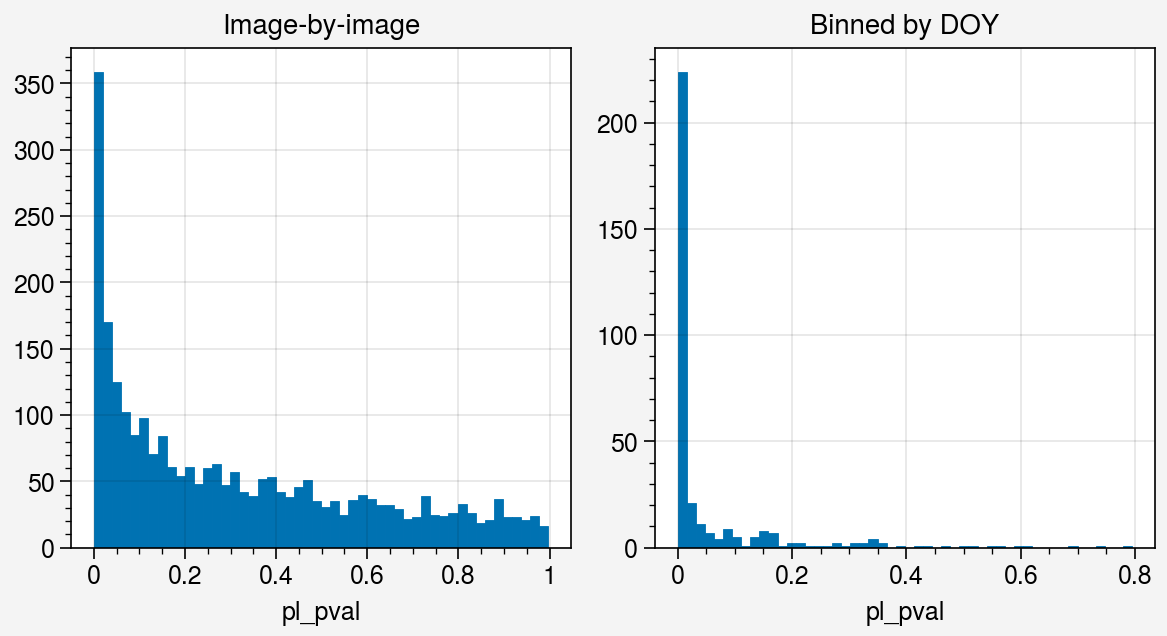

In [223]:
fig, ax = pplt.subplots(ncols=2, share=False)
ax[0].hist(results['pl_pval'], bins=50)
print('Image-by-image:', np.round(np.mean(results['pl_pval'] < 0.05), 3))
ax[0].format(title='Image-by-image')
ax[1].hist(results_alt['pl_pval'], bins=50)
print('DOY:', np.round(np.mean(results_alt['pl_pval'] < 0.05), 3))
ax[1].format(title='Binned by DOY')

In [204]:
results[['month', 'pl_pval']].dropna().groupby('month').apply(lambda x: np.mean(x < 0.05))

month
3    0.187500
4    0.165132
5    0.113806
6    0.075370
7    0.037356
8    0.017241
9    0.000000
dtype: float64

In [201]:
results[['month', 'pl_pval']].dropna().groupby('month').count()

,pl_pval
month,
3,8
4,869
5,804
6,743
7,174
8,29
9,15


In [220]:
results_alt[['month', 'pl_pval']].dropna().groupby('month').apply(lambda x: np.mean(x < 0.05))

month
4    0.500000
5    0.491935
6    0.475000
7    0.306452
8    0.209677
9    0.250000
dtype: float64

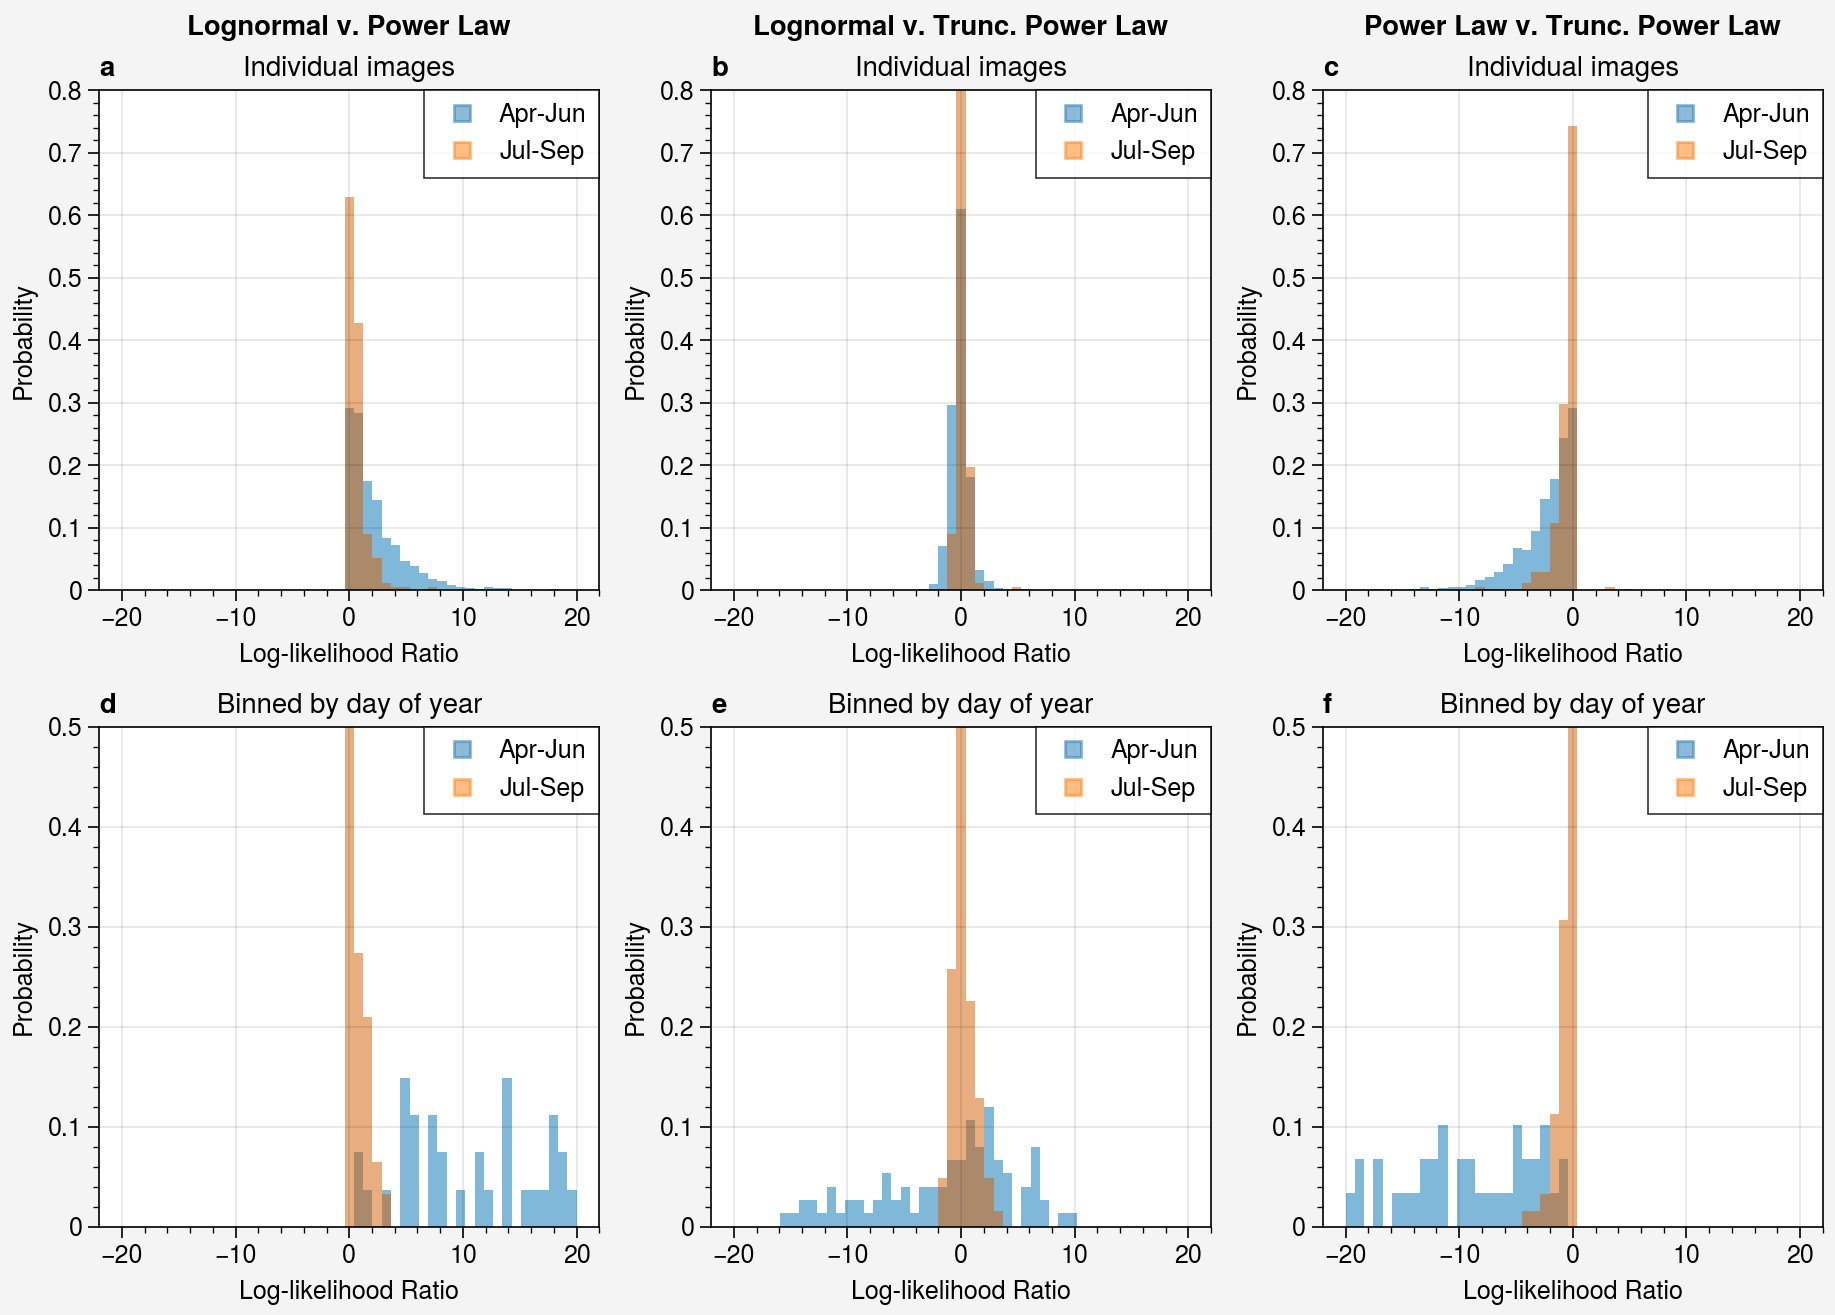

In [347]:
fig, axs = pplt.subplots(ncols=3, nrows=2, share=False)

for col, var in enumerate(['lr_PL_v_TPL', 'lr_PL_v_LN', 'lr_LN_v_TPL']):
    row = 0
    ax = axs[row, col]
    for idx in [results.datetime.dt.month <= 6, results.datetime.dt.month > 6]:
        ax.hist(results.loc[idx, var], alpha=0.5, density=True, bins=np.linspace(-20, 20, 50))
        ax.format(xlabel='Log-likelihood Ratio', title='Individual images', ylim=(0, 0.8), ylabel='Probability')
        
    h = [ax.plot([],[], color=c, alpha=0.5, m='s', lw=0) for c in ['tab:blue', 'tab:orange']]
    ax.legend(h, ['Apr-Jun', 'Jul-Sep'], loc='ur', ncols=1)
        
    row = 1
    ax = axs[row, col]
    for idx in [results_alt.doy <= pd.to_datetime('2020-06-30').dayofyear,
                results_alt.doy > pd.to_datetime('2020-06-30').dayofyear]:
        ax.hist(results_alt.loc[idx, var], alpha=0.5, density=True, bins=np.linspace(-20, 20, 50))
        ax.format(xlabel='Log-likelihood Ratio', title='Binned by day of year', ylabel='Probability')

    h = [ax.plot([],[], color=c, alpha=0.5, m='s', lw=0) for c in ['tab:blue', 'tab:orange']]
    ax.legend(h, ['Apr-Jun', 'Jul-Sep'], loc='ur', ncols=1)
fig.format(toplabels=['Lognormal v. Power Law', 'Lognormal v. Trunc. Power Law', 'Power Law v. Trunc. Power Law'],
           abc=True)
for ax in axs[row, :]:
    ax.format(ylim=(0, 0.5))
fig.save('../figures/fig05_log_likelihoods.pdf')
fig.save('../figures/fig05_log_likelihoods.png', dpi=300)

## False discovery rate procedure for multiple hypothesis testing (Bejamini-Hochberg procedure).

Sort the $p$ values for all tests, so the $p_k$ is the $k$th largest $p$ value. Let $m$ be the number of tests. Then for significance level $\alpha$, we consider all tests with 
$$P_k \leq \frac km \alpha$$
to be statistically significant. 


In [224]:
p = list(results['p_PL_v_TPL']) + list(results['p_PL_v_LN']) + list(results['p_LN_v_TPL']) + \
    list(results_alt['p_PL_v_TPL']) + list(results_alt['p_PL_v_LN']) + list(results_alt['p_LN_v_TPL'])
p.sort()
alpha = 0.01
test = np.array(p) < alpha*(np.arange(1, len(p)+1)/len(p))
alpha_equiv = max(np.array(p)[test])
print(alpha_equiv)

0.0004904847213833552


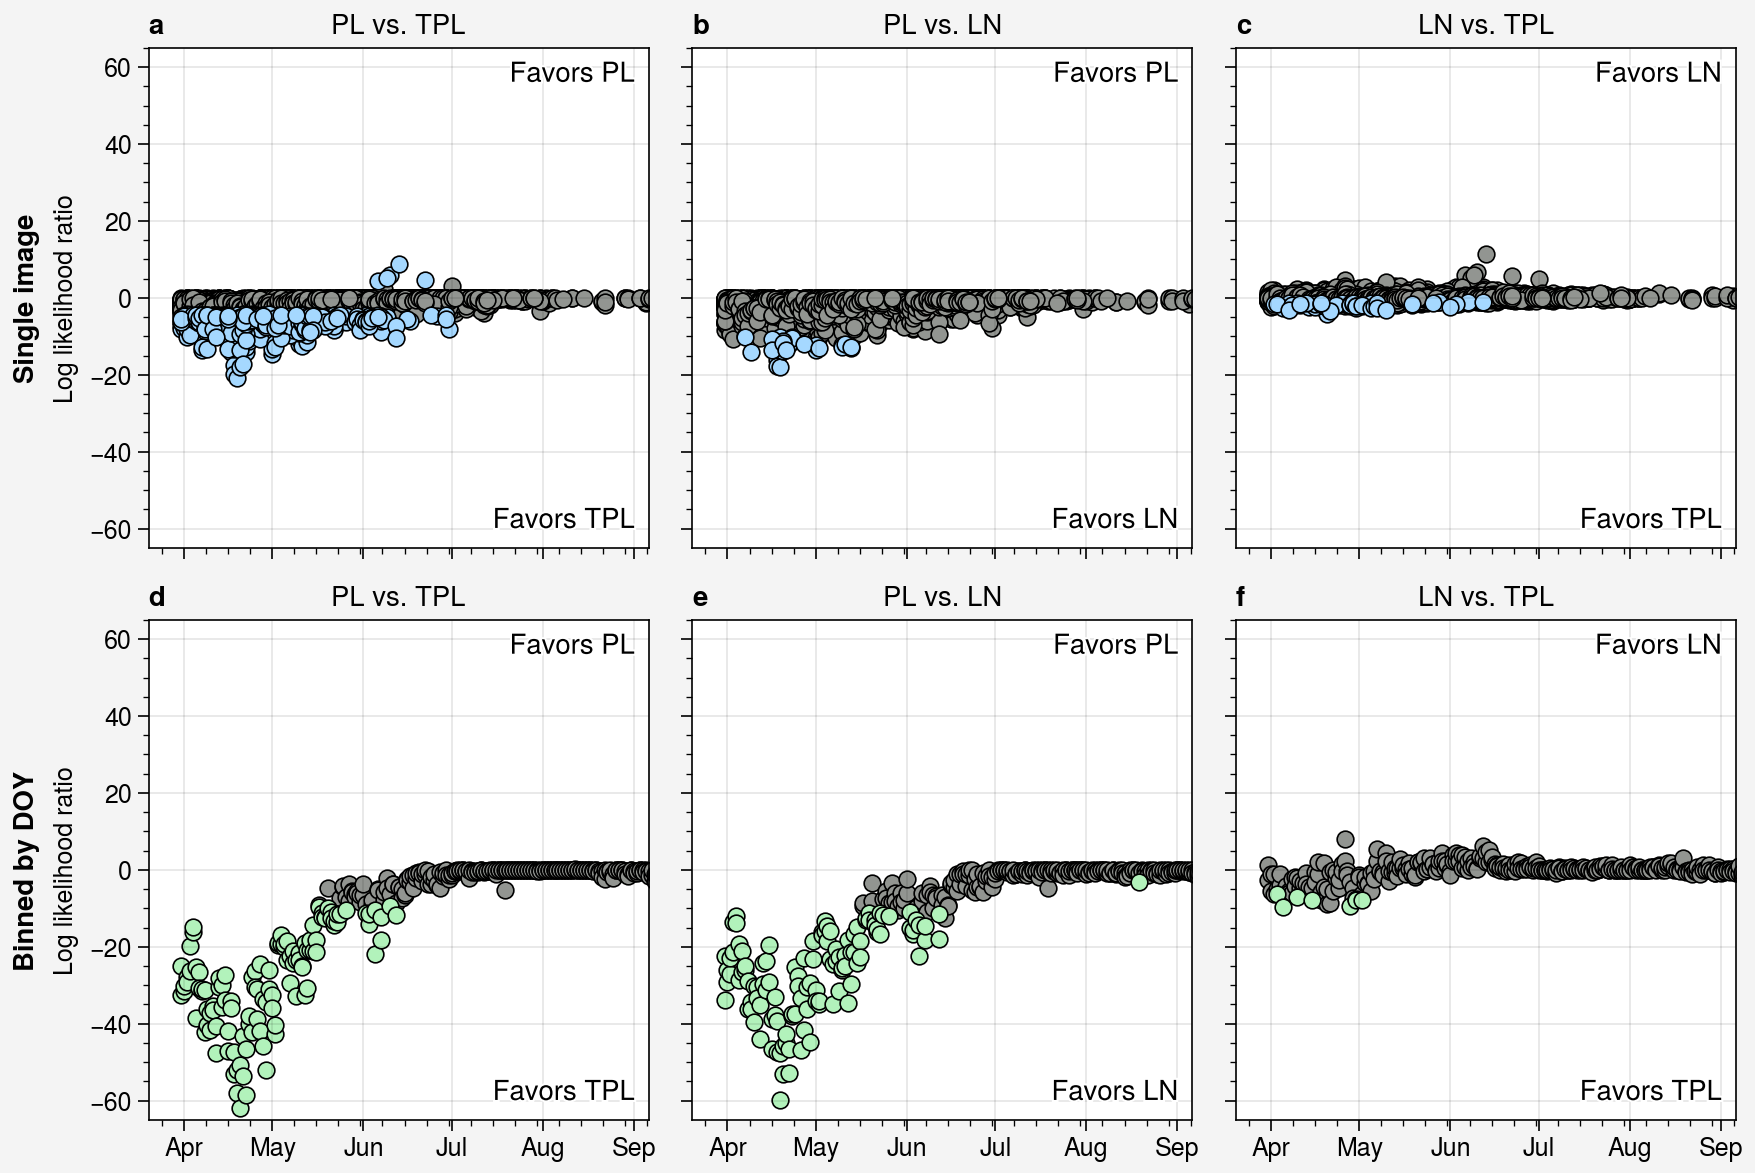

In [252]:
alpha = 0.01

fig, axs = pplt.subplots(ncols=3, nrows=2, span=False)
for ax, comp in zip(axs[0,:], ['PL_v_TPL', 'PL_v_LN', 'LN_v_TPL']):

    # False discovery rate adjustment - more stringent p-value than alpha since we 
    # are calculating it numerous times
    p = list(results['lr_' + comp])
    p.sort()
    test = np.array(p) < alpha*(np.arange(1, len(p)+1)/len(p))
    alpha_equiv = max(np.array(p)[test])
    ax.scatter(results.doy, results['lr_' + comp].where(results['p_' + comp] > alpha_equiv),
               marker='o', facecolor='gray', edgecolor='k')
    ax.scatter(results.doy, results['lr_' + comp].where(results['p_' + comp] <= alpha_equiv),
               marker='o', facecolor='blue2', edgecolor='k')
    
    ax.format(ylabel='Log likelihood ratio', title=comp.replace('v', 'vs.').replace('_', ' '),
              xlabel='', ylim=(-65, 65))
    # ax.text(214, 7, comp.split('_')[0])
    # ax.text(214, -18, comp.split('_')[2])
    ax.format(urtitle='Favors ' + comp.split('_')[0],
              lrtitle='Favors ' + comp.split('_')[2])
    # ax2 = ax.twinx()
    # ax2.plot(results.datetime.dt.dayofyear.groupby(results['month']).mean().values,
    #          100*(results['p_' + comp] <= alpha_equiv).groupby(results['month']).mean().values,
    #         marker='.')
    # ax2.format(ylim=(-100, 100))    
    
for ax, comp in zip(axs[1,:], ['PL_v_TPL', 'PL_v_LN', 'LN_v_TPL']):
    p = list(results_alt['lr_' + comp])
    p.sort()
    test = np.array(p) < alpha*(np.arange(1, len(p)+1)/len(p))
    alpha_equiv = max(np.array(p)[test])

    ax.scatter(results_alt.doy, results_alt['lr_' + comp].where(results_alt['p_' + comp] > alpha_equiv),
               marker='o', facecolor='gray', edgecolor='k')
    
    ax.scatter(results_alt.doy, results_alt['lr_' + comp].where(results_alt['p_' + comp] <= alpha_equiv),
               marker='o', facecolor='green2', edgecolor='k')
    
    ax.format(ylabel='Log likelihood ratio', title=comp.replace('v', 'vs.').replace('_', ' '),
             xlocator=dr.dayofyear, xformatter=[d.strftime('%b') for d in dr], xlabel='',
              ylim=(-65, 65), xlim=(80, 250))
    # ax.text(214, 7, comp.split('_')[0])
    # ax.text(214, -50, comp.split('_')[2])
    ax.format(urtitle='Favors ' + comp.split('_')[0],
              lrtitle='Favors ' + comp.split('_')[2])
    # ax2 = ax.twinx()
    # ax2.plot(results_alt.doy.groupby(results_alt['month']).mean().values,
    #          100*(results_alt['p_' + comp] <= alpha_equiv).groupby(results_alt['month']).mean().values,
    #         marker='.')
    # ax2.format(ylim=(-100, 100))
axs.format(leftlabels=['Single image', 'Binned by DOY'], abc=True)    
fig.save('../figures/fig04_likelihood_ratio_results.png', dpi=300)
fig.save('../figures/fig04_likelihood_ratio_results.pdf', dpi=300)

In [231]:
# Blue line: percent that are significant by month


month
4    105.0
5    135.0
6    165.5
7    196.0
8    227.0
9    250.5
Name: doy, dtype: float64

For the single images, we see occasional significant tests early in the year. Log likelihoods rarely favor the power law. We see smaller differences toward the summer throughout. The log likelihoods show no preference between log normal and truncated power law. For the data binned by DOY, during the early part of the year both truncated power laws and lognormal power laws are significantly more likely than pure power laws; the likelihood ratios cannot distinguish between lognormal and truncated power law.

Try alternative approach: plot the fraction of images with significant differences by month

In [404]:
results['date'] = pd.to_datetime(results['date'])

## Example PDFs and CDFs

Showing the PDF and CCDF of the distributions -- use a representative day of year, and show
* light lines showing the range across the years
* dark line showing a single year, with the best fit next to it
* another line showing the fit with all the years grouped together

In [109]:
np.random.choice([date for date in dates if pd.to_datetime(date).month == 4])

numpy.datetime64('2017-04-03T13:55:35.000000000')

In [132]:
np.random.choice([date for date in dates if pd.to_datetime(date).month == 5])

numpy.datetime64('2012-05-31T11:49:23.000000000')

In [133]:
np.random.choice([date for date in dates if pd.to_datetime(date).month == 6])

numpy.datetime64('2005-06-14T13:48:38.000000000')

In [136]:
med_groups = df.groupby('datetime').filter(lambda x: len(x) > 100)
dates2 = np.unique(med_groups['datetime'])
sample2 = np.random.choice(dates, 100)
np.random.choice([date for date in dates2 if pd.to_datetime(date).month == 7])

numpy.datetime64('2007-07-13T13:55:44.000000000')

In [112]:
example_date = pd.to_datetime('2017-04-03T13:55:35')
example_date.dayofyear

93

In [137]:
np.random.choice([date for date in dates2 if pd.to_datetime(date).month == 8])

numpy.datetime64('2010-08-02T11:25:22.000000000')

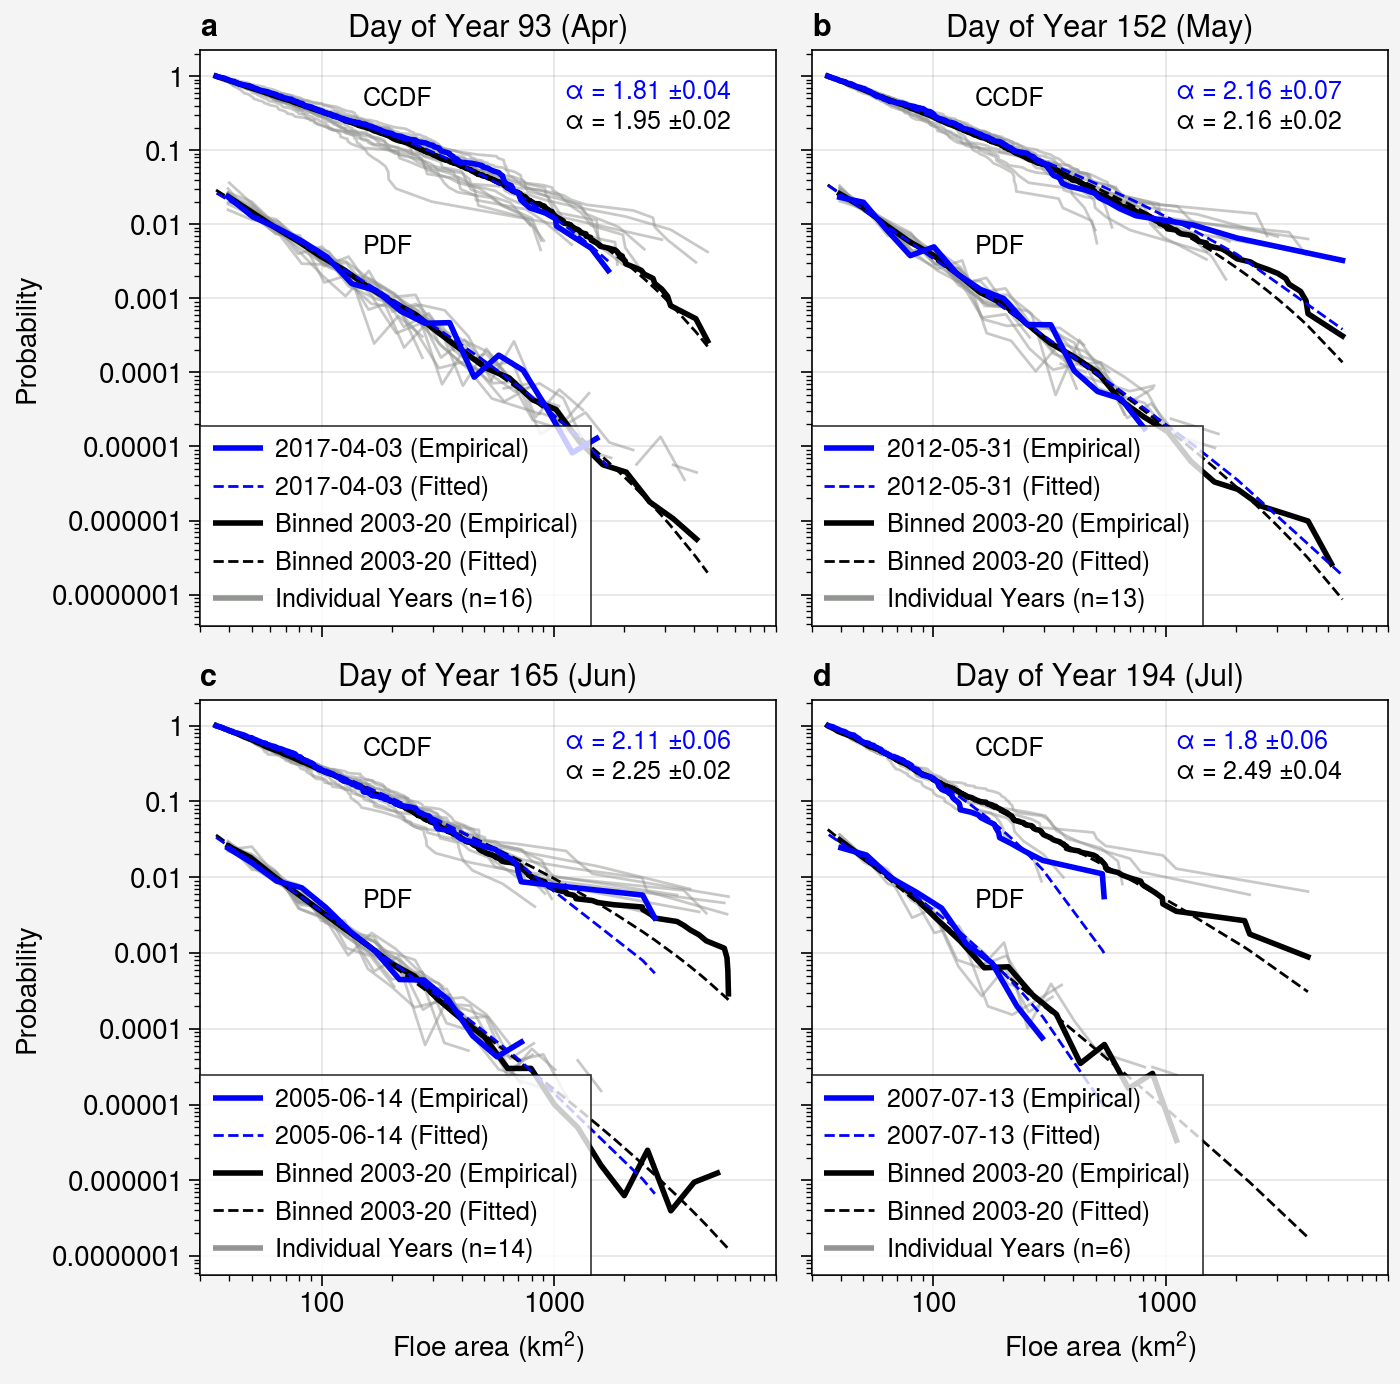

In [135]:
fig, axs = pplt.subplots(width=7, ncols=2, nrows=2, span=False)
# In case you want to try specifying an x max instead
xmax = None
for ax, example_date in zip(axs, [pd.to_datetime('2017-04-03T13:55:35'),
                                     pd.to_datetime('2012-05-31T11:49:23'),
                                     pd.to_datetime('2005-06-14T13:48:38'),
                                     pd.to_datetime('2007-07-13T13:55:44')]):

    satellite = df.loc[df.datetime == example_date].satellite.values[0]
    n = 0
    for year, group in df.groupby(df.datetime.dt.year):
        data = group.loc[(group.datetime.dt.dayofyear == example_date.dayofyear) & (group.satellite == satellite), 'area_adj_km']
        
        if len(data) > 100:
            fit = powerlaw.Fit(data,xmin=35, xmax=xmax)
            fit.plot_pdf(color='gray', linewidth=1, alpha=0.5, ax=ax)
            fit.plot_ccdf(color='gray', linewidth=1, alpha=0.5, ax=ax)
            n += 1
            
    data = df.loc[(df.datetime.dt.dayofyear == example_date.dayofyear) & (df.satellite==satellite), 'area_adj_km']
    fit = powerlaw.Fit(data,xmin=35, xmax=xmax)
    
    fit.plot_pdf(color='k', linewidth=2, ax=ax)
    fit.plot_ccdf(color='k', linewidth=2, ax=ax)
    fit.truncated_power_law.plot_pdf(color='k', ax=ax, linestyle='--', lw=1)
    fit.truncated_power_law.plot_ccdf(color='k', linestyle='--', lw=1, ax=ax)  
    alpha_all = np.round(fit.truncated_power_law.alpha,2)
    se_all =  np.round((alpha_all - 1)/np.sqrt(len(data)),2)
    ax.text(1100, 0.2,'$\\alpha$ = ' + str(alpha_all) + ' $\pm$' + str(se_all), color='k')

    
    data=df.loc[df.datetime == example_date].area_adj_km
    fit = powerlaw.Fit(data,xmin=35, xmax=xmax)
    alpha_one = np.round(fit.truncated_power_law.alpha,2)
    se_one = np.round((alpha_one - 1)/np.sqrt(len(data)),2)
    ax.text(1100, 0.5,'$\\alpha$ = ' + str(alpha_one) + ' $\pm$' + str(se_one), color='b')

    
    fit.plot_pdf(color='b', linewidth=2, ax=ax)
    fit.truncated_power_law.plot_pdf(color='b', ax=ax, linestyle='--', lw=1)
    fit.plot_ccdf(color='b', linewidth=2, ax=ax)
    fit.truncated_power_law.plot_ccdf(color='b', linestyle='--', lw=1, ax=ax)
    ax.format(xlabel = 'Floe area (km$^2$)', ylabel='Probability',
             xlim=(30, 9000), title='Day of Year ' + str(example_date.dayofyear) + ' (' + example_date.strftime('%b') + ')')
    
    
    ax.text(150, 0.4, 'CCDF')
    ax.text(150, 0.004, 'PDF')


    # ax.text(750,.55,'xmin = '+str(fit.xmin)+' km$^2$')
    # ax.text(750,.3,'xmax = '+str(np.round(np.amax(data),0))+' km$^2$')
    # ax.text(750,.18,'N = '+str(len(data[data > fit.xmin])))
    h = [ax.plot([],[],color=c, lw=lw, ls=ls) for c, lw, ls in zip(['b', 'b',  'k', 'k', 'gray'],
                                                                   [2, 1, 2, 1, 2, 1],
                                                                   ['-', '--', '-', '--', '-', '-'])]
    ax.legend(h, [example_date.strftime('%Y-%m-%d' + ' (Empirical)'),
               example_date.strftime('%Y-%m-%d' + ' (Fitted)'),
               'Binned 2003-20 (Empirical)',
                  'Binned 2003-20 (Fitted)',
                  'Individual Years (n=' + str(n) + ')'], loc='ll', order='F', ncols=1)

axs.format(abc=True, fontsize=10)
fig.save('../figures/fig06_example_dates_fsd.pdf')
fig.save('../figures/fig06_example_dates_fsd.png', dpi=300)

## Tracked floes vs all floes
Checking whether the PDF and CCDF of the data are substantially different when we look at tracked floes only versus when we look at the full dataset.

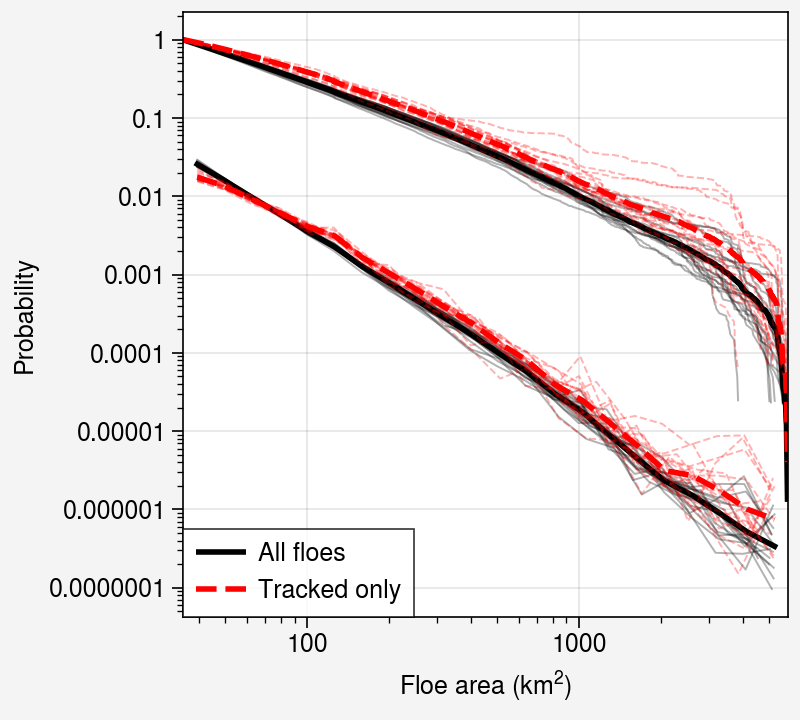

In [292]:
fig, ax = pplt.subplots(width=4)
xmax=90000
for year, group in df.groupby(df.datetime.dt.year):
    data = group.area_adj_km
    fit = powerlaw.Fit(data,xmin=35, xmax=xmax)
    fit.plot_pdf(color='k', linewidth=0.7, ax=ax, label='', alpha=0.3)
    fit.plot_ccdf(color='k', linewidth=0.7, ax=ax, alpha=0.3)
data = df.area_adj_km
fit = powerlaw.Fit(data,xmin=35, xmax=xmax)
fit.plot_pdf(color='k', linewidth=2, ax=ax, label='All floes')
fit.plot_ccdf(color='k', linewidth=2, ax=ax)

for year, group in df.loc[(df.floe_id != 'unmatched')].groupby(
                df.loc[(df.floe_id != 'unmatched')].datetime.dt.year):
    data = group.area_adj_km
    fit = powerlaw.Fit(data,xmin=35, xmax=xmax)
    fit.plot_pdf(color='r', linewidth=0.7, ax=ax, label='', alpha=0.3, ls='--')
    fit.plot_ccdf(color='r', linewidth=0.7, ax=ax, alpha=0.3, ls='--')

data = df.loc[(df.floe_id != 'unmatched')].area_adj_km
fit = powerlaw.Fit(data,xmin=35, xmax=xmax)
fit.plot_pdf(color='r', linewidth=2, ax=ax, label='Tracked only', ls='--')
fit.plot_ccdf(color='r', linewidth=2, ax=ax, ls='--')
ax.legend(loc='ll', ncols=1)
ax.format(xlabel='Floe area (km$^2$)', ylabel='Probability')
fig.save('../figures/fig09_all_floes_v_tracked_FSD.png')
fig.save('../figures/fig09_all_floes_v_tracked_FSD.pdf')

TBD: Using QQ plots for goodness of fit tests

We'd need to get the parameters for the distribution we're comparing to, and think about how to aggregate over multiple days

Some alternate ideas:
* breaking it up by edge distance & coast distance
* pooling by day of year beofre calculating fit

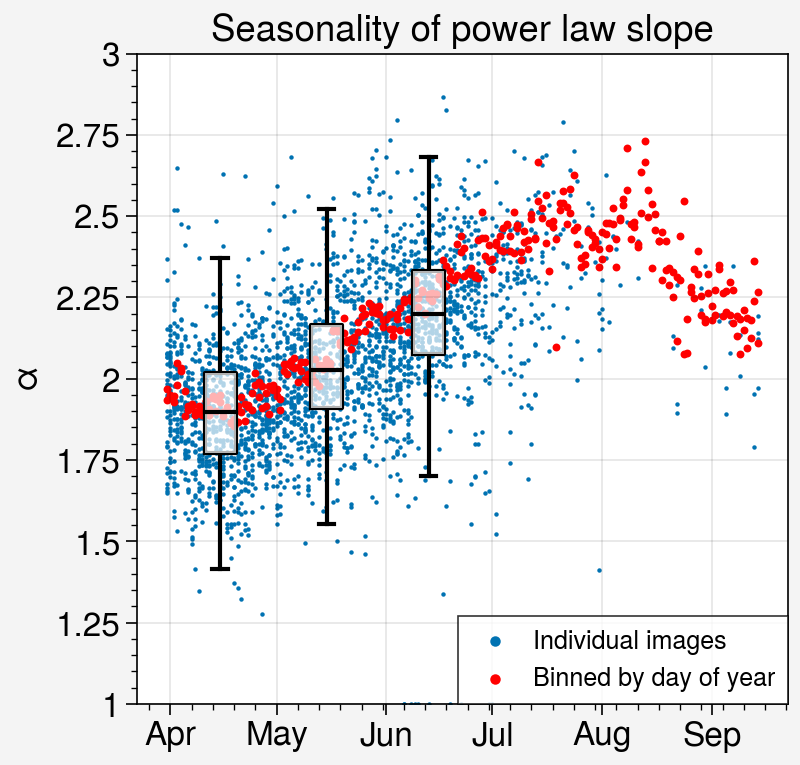

In [262]:
doy = results.groupby('month').mean()['doy']
fig, ax = pplt.subplots(width=4)
n_threshold = 1 #
month_threshold = 300
variable = 'alpha_tpl'
time_idx = (results.month != 3) & (results.month <= 9)
df_pivot = results.loc[time_idx & (results.n > n_threshold)].pivot_table(index='datetime', values=variable, columns='month')
month_counts = df_pivot.notnull().sum() 
month_idx = [m for m in month_counts.index if month_counts[m] > month_threshold]
_ = ax.box(doy[month_idx].values/30, df_pivot[month_idx], facecolor='w', alpha=0.7, zorder=1, lw=1.5, marker='')
_ = ax.scatter(results.loc[results.n > n_threshold].datetime.dt.dayofyear/30,
               results.loc[results.n > n_threshold, variable], marker='o', ms=1, zorder=0, label='Individual images')
_ = ax.scatter(results_alt.doy/30, results_alt[variable], marker='o', ms=5, zorder=0, color='r', label='Binned by day of year')

ax.format(ylim=(1, 3), xlocator=dr.dayofyear/30, xformatter=[d.strftime('%b') for d in dr],
          xlabel='', ylabel='$\\alpha$', title='Seasonality of power law slope', fontsize=12)
ax.legend(loc='lr', ncols=1, ms=10, fontsize=12)

# PDF for publication, PNG for slides
fig.save('../figures/fig07_fsd_slope.pdf', dpi=300)
fig.save('../figures/fig07_fsd_slope.png', dpi=300)

# Median and interquartile range of the truncated power law fit

In [289]:
df_pivot[month_idx].quantile(0.5)

month
4    2.060498
5    2.190617
6    2.325672
7    3.118784
Name: 0.5, dtype: float64

In [270]:
df_pivot[month_idx].quantile(0.75) - df_pivot[month_idx].quantile(0.25)

month
4    0.244847
5    0.256957
6    0.252722
dtype: float64

In [272]:
df_pivot[month_idx].quantile(0.9) - df_pivot[month_idx].quantile(0.1)

month
4    0.459574
5    0.520349
6    0.506069
dtype: float64

# Comparison of seasonality with standard power law
Although we find that the likelihood of the standard power law is lower than that of the truncated power law, it is useful to see how sensitive our results are to that choice. We find that the sample-to-sample spread is larger with the truncated power law, potential due to the more flexible fitting with two parameters, and that the same timing appears in both (minimum in april, maximum in july/aug, however the minimum is lower for the truncated power law.

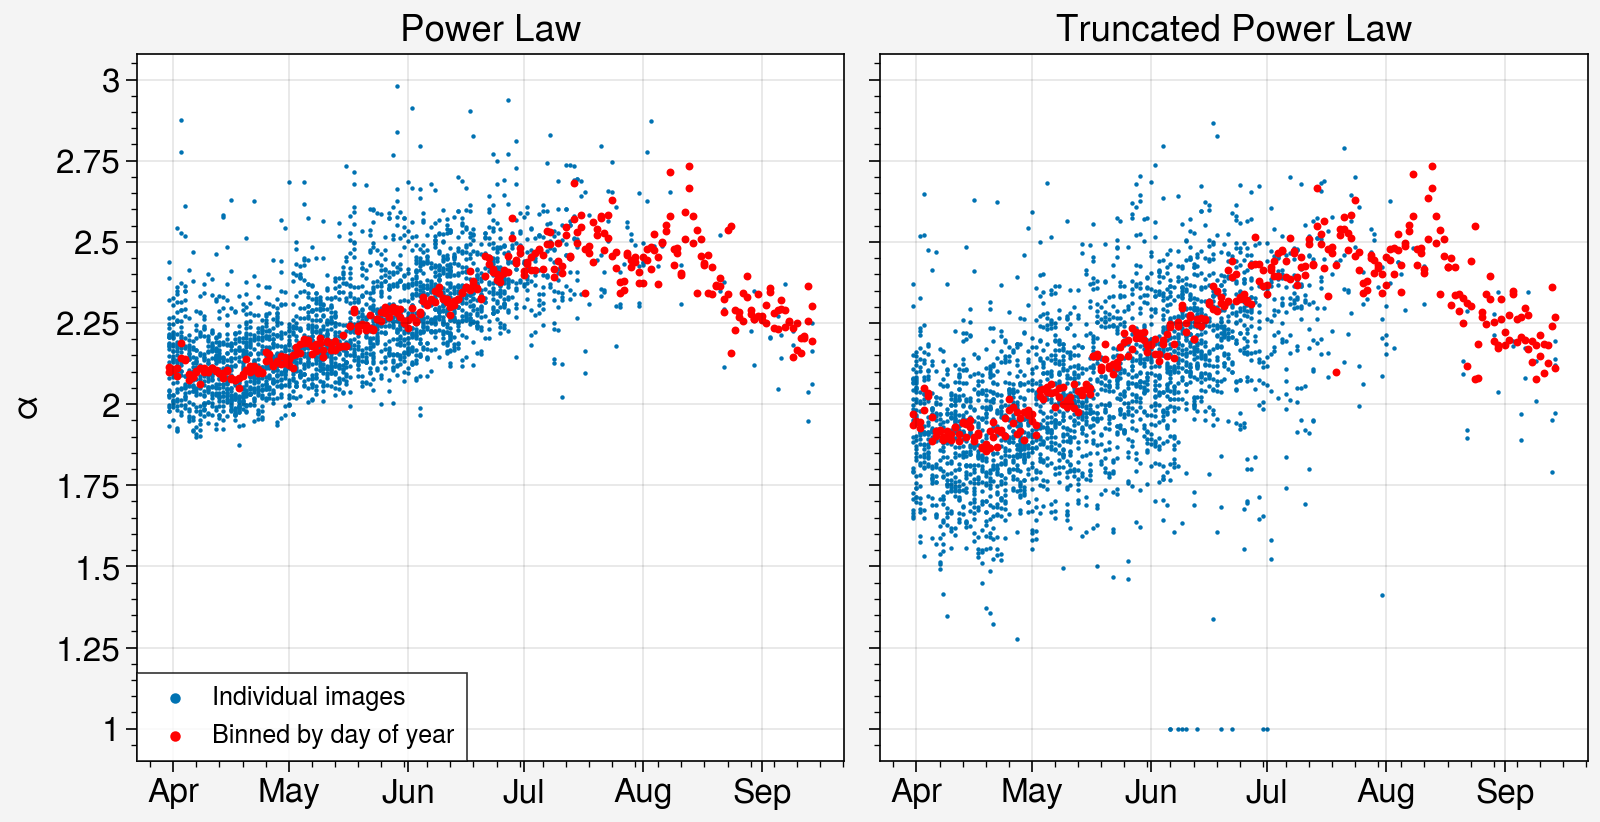

In [287]:

fig, axs = pplt.subplots(width=8, ncols=2, share=True)
min_n = 100
time_idx = (results.month != 3) & (results.month <= 9)
for ax, var, title in zip(axs, ['alpha', 'alpha_tpl'], ['Power Law', 'Truncated Power Law']):
    df_pivot = results.loc[time_idx & (results.n > min_n)].pivot_table(index='datetime', values=var, columns='month')
    month_counts = df_pivot.notnull().sum() 
    month_idx = [m for m in month_counts.index if month_counts[m] > 100]
    _ = ax.scatter(results.loc[results.n > min_n].datetime.dt.dayofyear/30, results.loc[results.n > min_n, var], marker='o', ms=1, zorder=0, label='Individual images')
    _ = ax.scatter(results_alt.doy/30, results_alt[var], marker='o', ms=5, zorder=0, color='r', label='Binned by day of year')
    
    ax.format(xlocator=dr.dayofyear/30, xformatter=[d.strftime('%b') for d in dr],
              xlabel='', fontsize=12, title=title)
axs[0].format(ylabel='$\\alpha$')
axs[1].format(ylabel='$\\alpha$')
axs[0].legend(loc='ll', ncols=1, ms=10)
# axs[0].format(ylim=(-40, 10))
# axs[1].format(ylim=(0,6))
fig.save('../figures/fsd_standard_vs_truncated_slope.png', dpi=300)

# Seasonality of the lognormal distribution fit
From this figure, we can see that there is a shift in July. It looks like there are two regions where the fit tends to hover - mu near zero and sigma between 1 and 5, or mu near -1000 and sigma between 25 and 30. By eye, it appears that the fit becomes much more erratic after July. I suspect that further analysis could determine whether this indicates a shift in the physical causes of FSD variation.

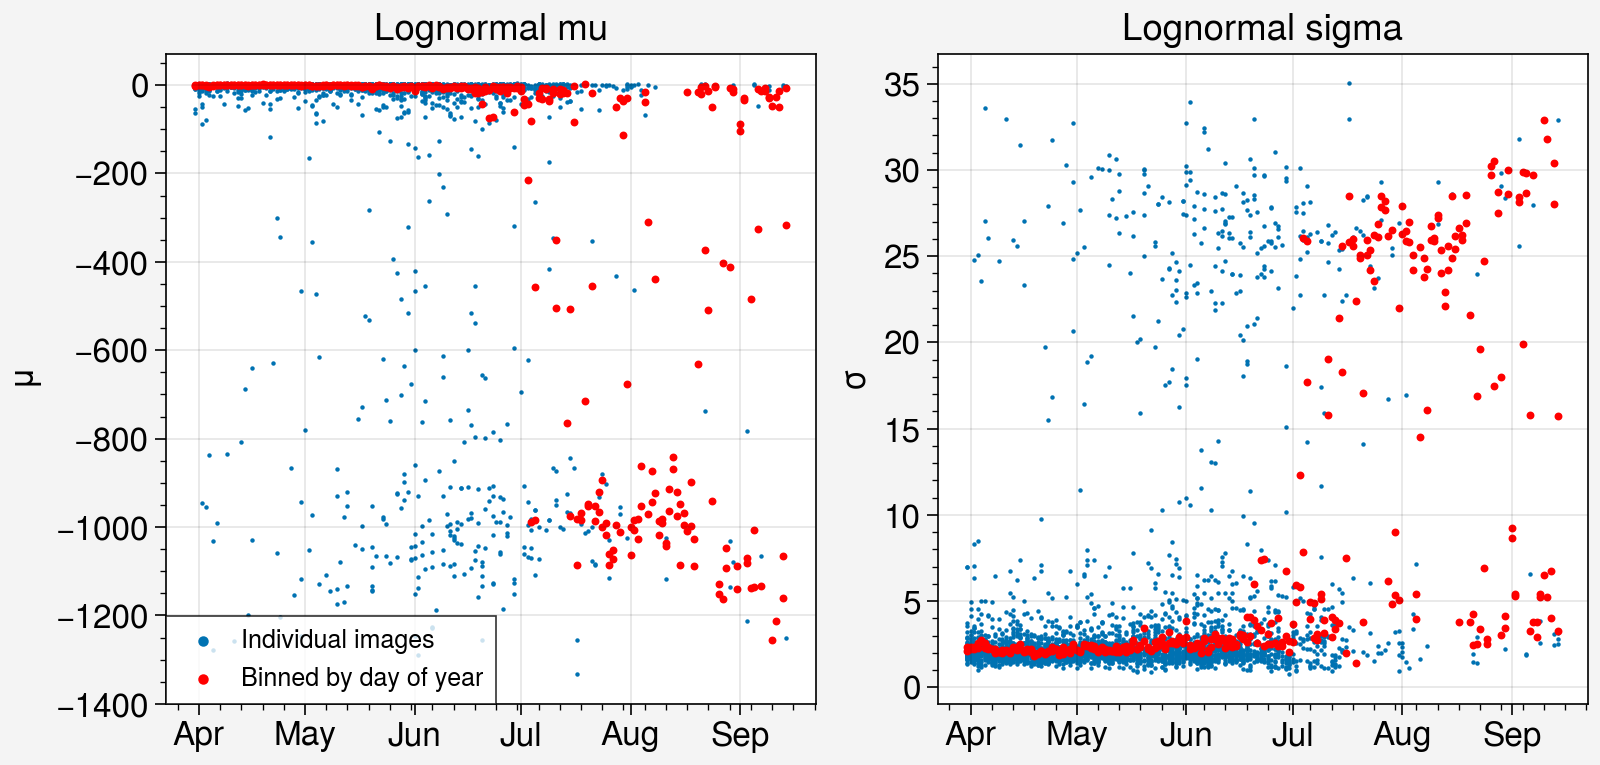

In [288]:

fig, axs = pplt.subplots(width=8, ncols=2, share=False, span=False)
min_n = 100
time_idx = (results.month != 3) & (results.month <= 9)
for ax, var, title in zip(axs, ['mu', 'sigma'], ['Lognormal mu', 'Lognormal sigma']):
    df_pivot = results.loc[time_idx & (results.n > min_n)].pivot_table(index='datetime', values=var, columns='month')
    month_counts = df_pivot.notnull().sum() 
    month_idx = [m for m in month_counts.index if month_counts[m] > 100]
    _ = ax.scatter(results.loc[results.n > min_n].datetime.dt.dayofyear/30, results.loc[results.n > min_n, var], marker='o', ms=1, zorder=0, label='Individual images')
    _ = ax.scatter(results_alt.doy/30, results_alt[var], marker='o', ms=5, zorder=0, color='r', label='Binned by day of year')
    
    ax.format(xlocator=dr.dayofyear/30, xformatter=[d.strftime('%b') for d in dr],
              xlabel='', fontsize=12, title=title)
axs[0].format(ylabel='$\mu$')
axs[1].format(ylabel='$\sigma$')
axs[0].legend(loc='ll', ncols=1, ms=10)
fig.save('../figures/fsd_lognormal_fit_parameters.png', dpi=300)

# notes

Updated FSD analysis
* Describe new data processing method in paper
* Describe area adjustment
* Power law vs lognormal

Discussion
Stern et al. reconciliation paper
- we don't have the issue of the largest floes being excluded by image size, however we also don't know how well the data samples the existing floes -- that will have to be its own paper
- 
Displacing and interpreting the results of the lognormal vs power law values

Rothrock and Thorndike 1984 introduced error estimation when sampling the FSD
We should point out that wave fraction has been shown to lead to a lognormal distribution, and that there is likely a shift in distributions that coincides with a shift between a fracture-based distribution change and a melt-rate based distribution change.

## Caveats
- Our method is repeated samples of floe sizes, across many images, rather than exhaustive calculation in a small set of images. Cautious comparison with prior studies. Future work to examine sampling. Assuming that sampling is similar across our dataset, then we can say that there is clear steepening through spring, and a likely shift in summer towards more shallow slopes. Our data shows that 

# Comparison to prior work
- Lu et al. 2008, slope of cumulative FSD steepens as ice edge is approached (summer)
- Paget et al. 2001 - slopes steepen towards edge (winter)
- Stern et al. 2018: slope of FSD steepens in spring as large floes break up
- Perovich and Jones - lateral melting would make the slope shallower at smaller floe sizes
- Stern et al. 2018b - some studies show shallower slopes for small floes, some steeper for small floes

Rejecting null hypothesis with K-S test of fitted distribution. D converges to 0 as n increases, so a large value of D is more likely to result in rejecting the null hypothesis with a large sample. I could make a plot with the data colored by whether the distribution is significantly different than the assumed distribution.

* Potential to build on Stern et al. 2018 work -- could we use their floe segmentation of MODIS imagery as a comparison point?


* Threshold for including image - 100 floes? or higher number?
Could do a simple bootstrap approach. For each increment of 10, resample alpha. Compute the percent error.